In [ ]:
! pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/ziya07/iot-secure-routing-dataset-for-intrusion-detection'
od.download(dataset_url)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler

In [ ]:
df = pd.read_csv('/content/iot-secure-routing-dataset-for-intrusion-detection/iot_routing_intrusion_dataset.csv')

# Visualisation of class separability

In [ ]:
srs_node = df['Source_Node'].unique()
dst_node= df['Destination_Node'].unique()
all_nodes = np.concatenate((srs_node, dst_node))
le = LabelEncoder()
all_nodes_Encoder = le.fit(all_nodes)
df['Source_Node'] = all_nodes_Encoder.transform(df['Source_Node'])
df['Destination_Node'] = all_nodes_Encoder.transform(df['Destination_Node'])

In [ ]:
scaler = MinMaxScaler()
df[['Source_Node', 'Destination_Node']] = scaler.fit_transform(df[['Source_Node', 'Destination_Node']])

In [ ]:
cols_to_scale = [
    "Protocol",
    "Encryption_Type",
    "Hash_Match"
]

In [ ]:
label_encoders = {}
scalers = {}

for col in cols_to_scale:
    # Label Encoding
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    # Standard Scaling
    sc = StandardScaler()
    df[col] = sc.fit_transform(df[[col]])
    scalers[col] = sc

In [ ]:
le_attack = LabelEncoder()
df["Attack_Type"] = le_attack.fit_transform(df["Attack_Type"])

In [ ]:
num_features = ['Packet_Size', 'Packet_Delay(ms)']

scaler = RobustScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df[num_features] = scaler.transform(df[num_features])

In [ ]:
exclude = ['Is_Attack', 'Attack_Type', 'Timestamp', 'Index', 'Unnamed: 0']
features_cols = [c for c in df.columns if c not in exclude]

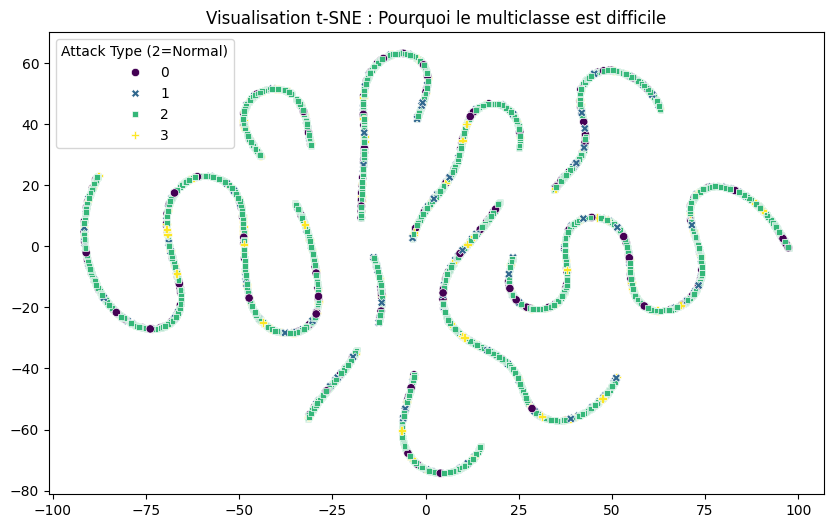

In [ ]:
df_sample = df.sample(5000, random_state=42)
features = df_sample[features_cols]
labels = df_sample['Attack_Type']

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=labels, palette='viridis', style=labels)
plt.title('Visualisation t-SNE : Pourquoi le multiclasse est difficile')
plt.legend(title='Attack Type (2=Normal)')
plt.show()

# TSNE 3D plot

In [ ]:
df_3d = df.sample(min(3000, len(df)), random_state=42)
X_3d = df_3d[features_cols]
y_3d = df_3d['Attack_Type'].astype(str)


tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
projections = tsne_3d.fit_transform(X_3d)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=y_3d,
    labels={'0': 'TSNE 1', '1': 'TSNE 2', '2': 'TSNE 3'},
    title='Visualisation 3D t-SNE des Intrusions RPL',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    opacity=0.7
)

fig.update_traces(marker=dict(size=3))
fig.show()

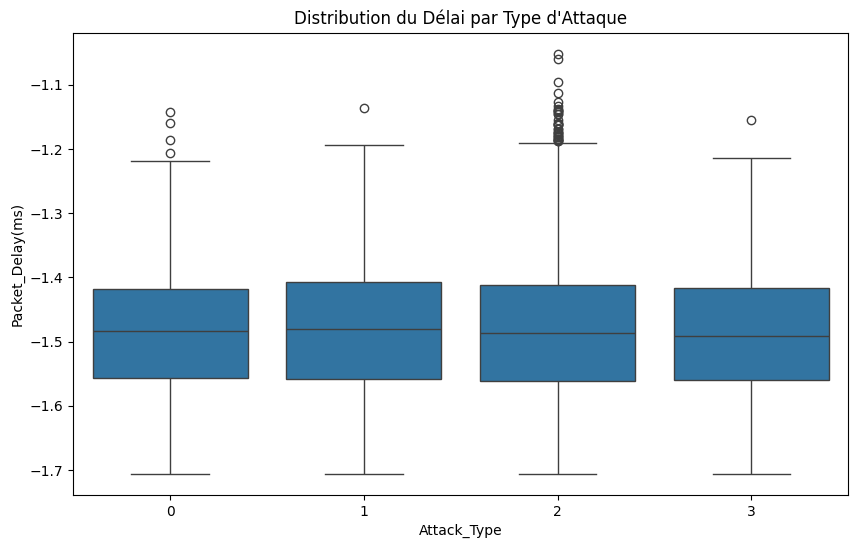

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack_Type', y='Packet_Delay(ms)', data=df)
plt.title('Distribution du Délai par Type d\'Attaque')
plt.show()

# 2. Analyse of varience per Class

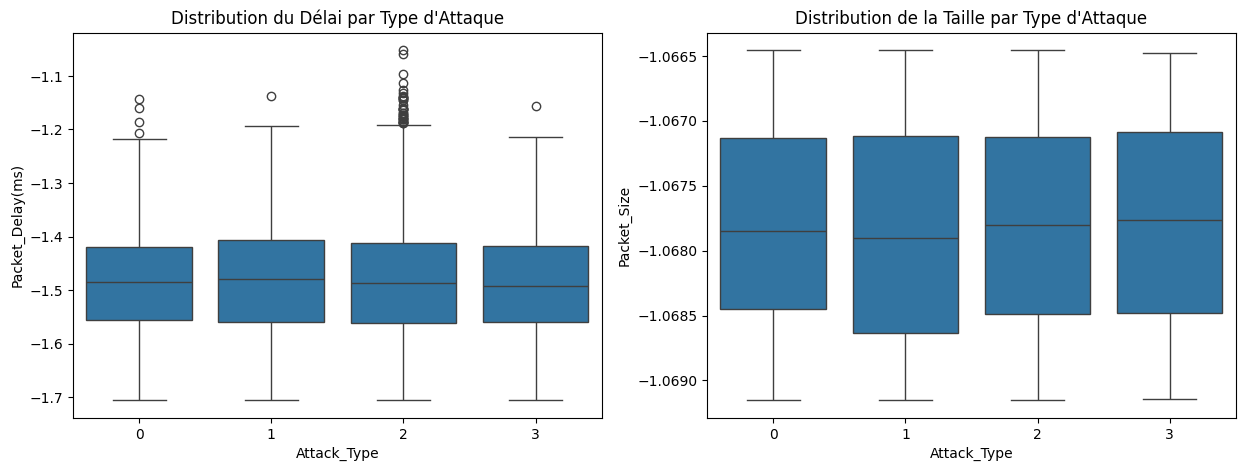

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attack_Type', y='Packet_Delay(ms)', data=df)
plt.title('Distribution du Délai par Type d\'Attaque')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attack_Type', y='Packet_Size', data=df)
plt.title('Distribution de la Taille par Type d\'Attaque')
plt.show()

# 3.Study of spearman correlation

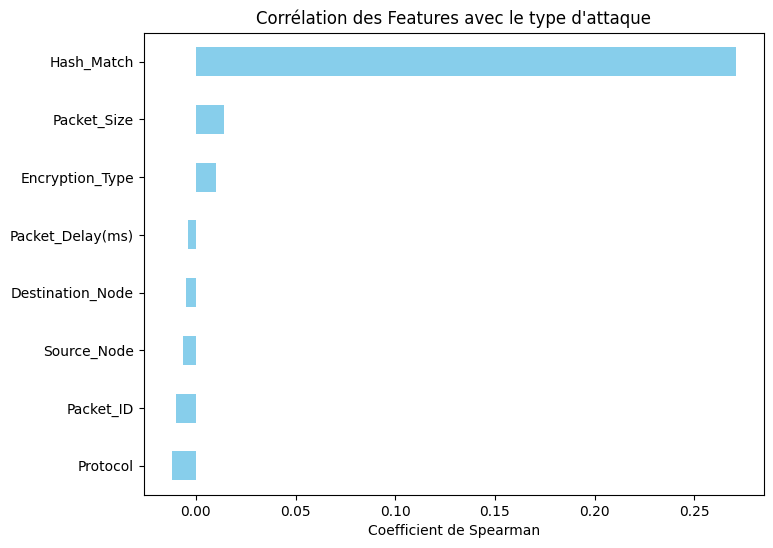

In [ ]:
correlations = df[features_cols + ['Attack_Type']].corr(method='spearman')['Attack_Type'].sort_values()

plt.figure(figsize=(8, 6))
correlations.drop('Attack_Type').plot(kind='barh', color='skyblue')
plt.title('Corrélation des Features avec le type d\'attaque')
plt.xlabel('Coefficient de Spearman')
plt.show()

# 4. Sequence analysis

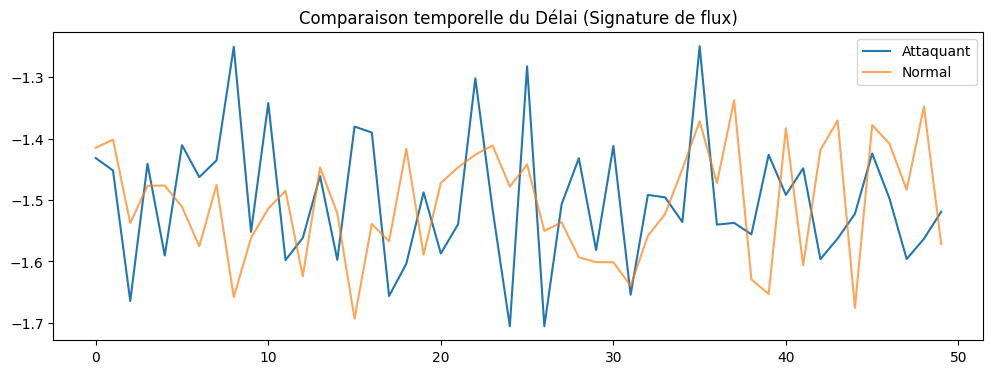

In [ ]:
node_id = df[df['Attack_Type'] != 2]['Source_Node'].iloc[0]
normal_node = df[df['Attack_Type'] == 2]['Source_Node'].iloc[0]

plt.figure(figsize=(12, 4))
plt.plot(df[df['Source_Node'] == node_id]['Packet_Delay(ms)'].values[:50], label='Attaquant')
plt.plot(df[df['Source_Node'] == normal_node]['Packet_Delay(ms)'].values[:50], label='Normal', alpha=0.7)
plt.title('Comparaison temporelle du Délai (Signature de flux)')
plt.legend()
plt.show()

# Visualisation of normal and abnormal class separability

In [ ]:
df_3d = df.sample(min(3000, len(df)), random_state=42)
X_3d = df_3d[features_cols]
y_3d = df_3d['Is_Attack'].astype(str)

tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
projections = tsne_3d.fit_transform(X_3d)


fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=y_3d,
    labels={'0': 'TSNE 1', '1': 'TSNE 2', '2': 'TSNE 3'},
    title='Visualisation 3D t-SNE des Intrusions RPL',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    opacity=0.7
)
fig.update_traces(marker=dict(size=3))
fig.show()

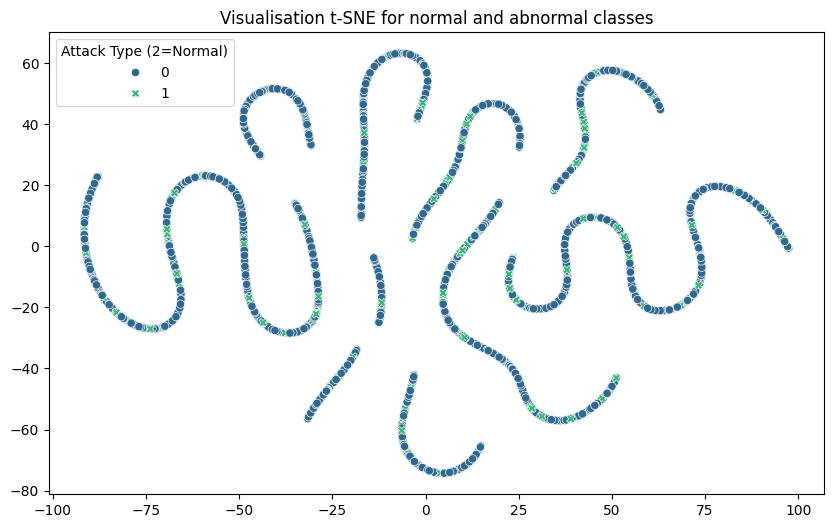

In [ ]:
df_sample = df.sample(5000, random_state=42)
features = df_sample[features_cols]
labels = df_sample['Is_Attack']

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=labels, palette='viridis', style=labels)
plt.title('Visualisation t-SNE for normal and abnormal classes')
plt.legend(title='Attack Type (2=Normal)')
plt.show()